In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Airline Tweets.csv to Airline Tweets.csv


In [3]:
# airline_tweets = pd.read_csv('//Users//amoolyabagalkoti//Downloads//archive//Airline Tweets.csv')
airline_tweets = pd.read_csv('Airline Tweets.csv')
airline_tweets.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


Description of Corpora

In [4]:
airline_tweets.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
airline_tweets.shape

(14640, 15)

In [6]:
airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
airline_tweets.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


In [8]:
# Convert to datetime64[ns]
airline_tweets['tweet_created'] = pd.to_datetime(airline_tweets['tweet_created'])
airline_tweets['tweet_created'] = airline_tweets['tweet_created'].dt.tz_localize(None)

In [9]:
airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   airline_sentiment_gold        40 non-null     object        
 7   name                          14640 non-null  object        
 8   negativereason_gold           32 non-null     object        
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  object        
 11  tweet_coord                 

# EDA

In [10]:
# Converting all the object type columns into categorical columns
for column in airline_tweets.select_dtypes(include=['object']).columns:
    airline_tweets[column] = airline_tweets[column].astype('category')

In [11]:
# Converting tweet_id into categorical
airline_tweets['tweet_id'] = airline_tweets['tweet_id'].convert_dtypes().astype('category')

In [12]:
airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  category      
 1   airline_sentiment             14640 non-null  category      
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   category      
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  category      
 6   airline_sentiment_gold        40 non-null     category      
 7   name                          14640 non-null  category      
 8   negativereason_gold           32 non-null     category      
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  category      
 11  tweet_coord                 

In [13]:
# EDA of numerical variables
airline_tweets.describe().T

,count,mean,min,25%,50%,75%,max,std
airline_sentiment_confidence,14640.0,0.900169,0.335,0.6923,1.0,1.0,1.0,0.16283
negativereason_confidence,10522.0,0.638298,0.0,0.3606,0.6706,1.0,1.0,0.33044
retweet_count,14640.0,0.08265,0.0,0.0,0.0,0.0,44.0,0.745778
tweet_created,14640,2015-02-21 11:33:24.781216,2015-02-16 23:36:05,2015-02-19 15:54:05.750000128,2015-02-22 04:44:35.500000,2015-02-23 08:04:11,2015-02-24 11:53:37,NaN


In [14]:
# EDA of categorical variables
airline_tweets.describe(include=['category']).T

,count,unique,top,freq
tweet_id,14640,14485,570281470507352064,2
airline_sentiment,14640,3,negative,9178
negativereason,9178,10,Customer Service Issue,2910
airline,14640,6,United,3822
airline_sentiment_gold,40,3,negative,32
name,14640,7701,JetBlueNews,63
negativereason_gold,32,13,Customer Service Issue,12
text,14640,14427,@united thanks,6
tweet_coord,1019,832,"[0.0, 0.0]",164
tweet_location,9907,3081,"Boston, MA",157


In [15]:
# EDA of datetime variable
airline_tweets.describe(include=['datetime']).T

,count,mean,min,25%,50%,75%,max
tweet_created,14640,2015-02-21 11:33:24.781216,2015-02-16 23:36:05,2015-02-19 15:54:05.750000128,2015-02-22 04:44:35.500000,2015-02-23 08:04:11,2015-02-24 11:53:37


In [16]:
# Date range
print(f"First date: ", airline_tweets['tweet_created'].min())
print(f"Last date: ", airline_tweets['tweet_created'].max())

First date:  2015-02-16 23:36:05
Last date:  2015-02-24 11:53:37


In [17]:
# Calculate daily tweet counts using grouping
daily_tweet_counts = airline_tweets.groupby(pd.Grouper(key='tweet_created', freq='D'))['tweet_id'].count()
print("Daily tweet counts")
print(daily_tweet_counts)

# Find the date with the maximum number of tweets
max_tweets_date = daily_tweet_counts.idxmax()
max_tweets_count = daily_tweet_counts.max()

# Find the date with the minimum number of tweets
min_tweets_date = daily_tweet_counts.idxmin()
min_tweets_count = daily_tweet_counts.min()

print(f"\nDate with maximum tweets: {max_tweets_date} ({max_tweets_count} tweets)")
print(f"\nDate with minimum tweets: {min_tweets_date} ({min_tweets_count} tweets)")

Daily tweet counts
tweet_created
2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3079
2015-02-23    3028
2015-02-24    1344
Freq: D, Name: tweet_id, dtype: int64

Date with maximum tweets: 2015-02-22 00:00:00 (3079 tweets)

Date with minimum tweets: 2015-02-16 00:00:00 (4 tweets)


# Data Visualization

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-19-23e897484ea9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


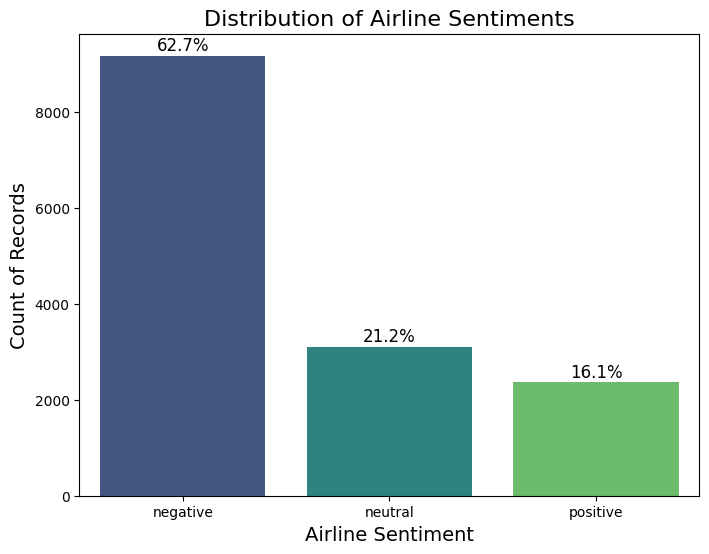

In [19]:
# Count records and calculate percentages
sentiment_counts = airline_tweets["airline_sentiment"].value_counts()
percentages = (sentiment_counts / sentiment_counts.sum()) * 100

# Plot the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Annotate the bars with percentages
for i, value in enumerate(sentiment_counts.values):
    plt.text(i, value + 115 , f"{percentages.iloc[i]:.1f}%", ha="center", fontsize=12, color="black")

# Add titles and labels
plt.title("Distribution of Airline Sentiments", fontsize=16)
plt.xlabel("Airline Sentiment", fontsize=14)
plt.ylabel("Count of Records", fontsize=14)

# Show plot
plt.show()

In [20]:
tweet_counts_by_airline = airline_tweets['airline'].value_counts()
print(tweet_counts_by_airline)

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64


<ipython-input-21-5c414cf3222a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tweet_counts_by_airline.index.to_list(), y=tweet_counts_by_airline.values, palette="viridis")


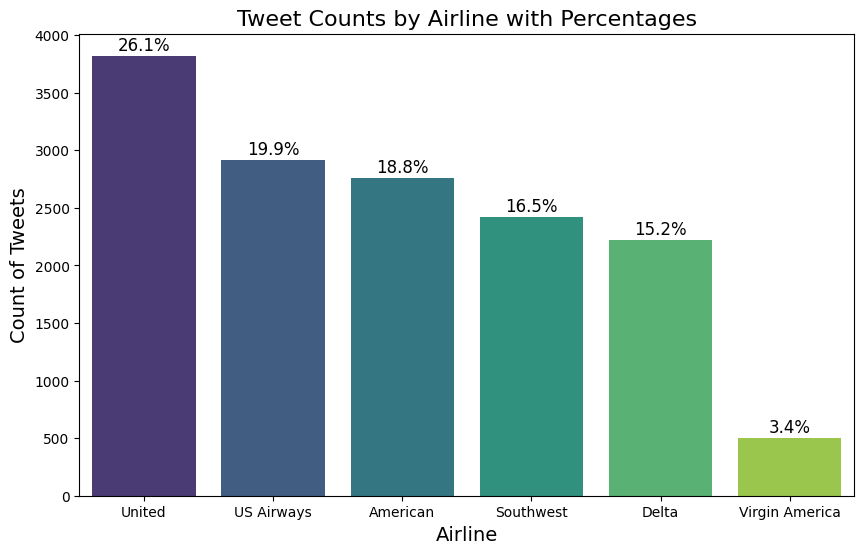

In [21]:
# Calculate percentages
percentages = (tweet_counts_by_airline / tweet_counts_by_airline.sum()) * 100

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=tweet_counts_by_airline.index.to_list(), y=tweet_counts_by_airline.values, palette="viridis")

# Annotate the bars with percentages
for i, value in enumerate(tweet_counts_by_airline.values):
    plt.text(
        i,  # x position
        value + 50,  # y position (5% offset from the top of the bar)
        f"{percentages.iloc[i]:.1f}%",  # percentage text
        ha="center",  # horizontally center the text
        fontsize=12,  # font size
        color="black"
    )

# Add titles and labels
plt.title("Tweet Counts by Airline with Percentages", fontsize=16)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Count of Tweets", fontsize=14)

# Show plot
plt.show()

In [22]:
# Group tweets by airline and sentiment, then count occurrences
tweets_by_sentiment_and_airline = airline_tweets.groupby(['airline', 'airline_sentiment']).size()
print(tweets_by_sentiment_and_airline)

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
dtype: int64


<ipython-input-22-4f375a7b905f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tweets_by_sentiment_and_airline = airline_tweets.groupby(['airline', 'airline_sentiment']).size()


In [23]:
tweets_by_sentiment_and_airline.columns = ['count']
tweets_by_sentiment_and_airline = tweets_by_sentiment_and_airline.reset_index()

In [24]:
tweets_by_sentiment_and_airline

,airline,airline_sentiment,0
0,American,negative,1960
1,American,neutral,463
2,American,positive,336
3,Delta,negative,955
4,Delta,neutral,723
5,Delta,positive,544
6,Southwest,negative,1186
7,Southwest,neutral,664
8,Southwest,positive,570
9,US Airways,negative,2263


<ipython-input-25-e0d48dde2717>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tweets_by_sentiment_and_airline['airline'] = tweets_by_sentiment_and_airline['airline'].fillna(method='ffill')


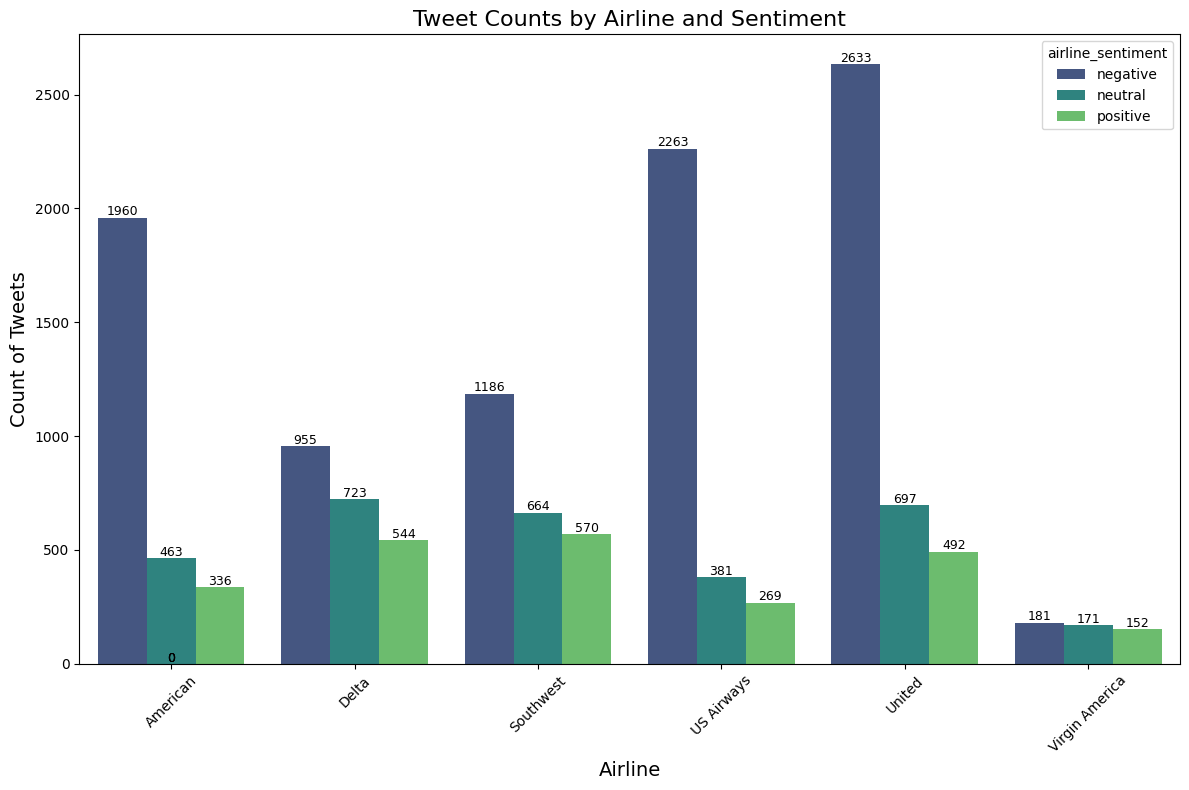

In [25]:
# Fill missing values for 'airline' column using forward fill method
tweets_by_sentiment_and_airline['airline'] = tweets_by_sentiment_and_airline['airline'].fillna(method='ffill')
# tweets_by_sentiment_and_airline['airline'] = tweets_by_sentiment_and_airline['airline'].fillna(method='ffill')

# Create the grouped bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='airline',
    y=0,
    hue='airline_sentiment',
    data=tweets_by_sentiment_and_airline,
    palette='viridis'
)

# Add titles and labels
plt.title("Tweet Counts by Airline and Sentiment", fontsize=16)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Count of Tweets", fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add values on top of each bar
for p in ax.patches:
    height = p.get_height()
    # Get the x position and width for better alignment
    x_pos = p.get_x() + p.get_width() / 2
    # Display the count value on top of the bar
    ax.text(x_pos, height + 10, int(height), ha='center', fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
# Distribution on tweets of all negative reasons
negativereason_counts = airline_tweets['negativereason'].value_counts()
negativereason_counts

,count
negativereason,
Customer Service Issue,2910
Late Flight,1665
Can't Tell,1190
Cancelled Flight,847
Lost Luggage,724
Bad Flight,580
Flight Booking Problems,529
Flight Attendant Complaints,481
longlines,178


<ipython-input-27-b0d89127276c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


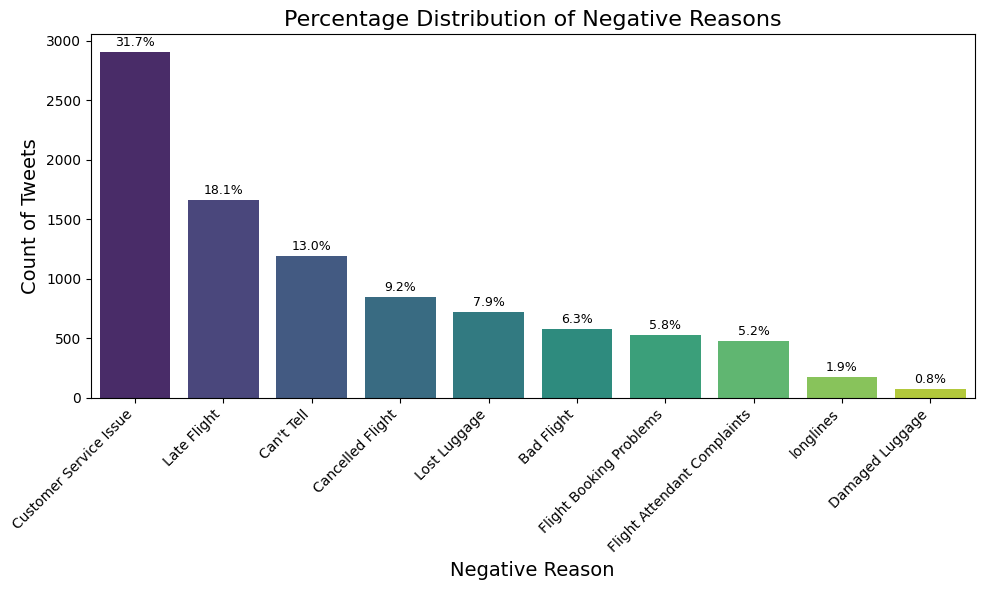

In [27]:
# Calculate the percentage distribution
negativereason_percentage = (negativereason_counts / negativereason_counts.sum()) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=negativereason_counts.index.to_list(),
    y=negativereason_counts.values,
    palette='viridis'
)

# Add percentage labels on top of each bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    category = negativereason_counts.index[i]  # Directly map the index to the category
    percentage = negativereason_percentage[category]  # Get the percentage from the category
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 50,  # Adjusting the height for label position
        f'{percentage:.1f}%',
        ha='center',
        fontsize=9
    )

# Add titles and labels
plt.title("Percentage Distribution of Negative Reasons", fontsize=16)
plt.xlabel("Negative Reason", fontsize=14)
plt.ylabel("Count of Tweets", fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def generate_wordcloud(tweets_df):
    # Combine all tweet texts into a single string
    tweet_texts = ' '.join(tweets_df['text'])

    # Clean the text: remove URLs, mentions, and retweets
    cleaned_text = " ".join([word for word in tweet_texts.split()
                             if 'http' not in word  # Exclude URLs
                             and not word.startswith('@')  # Exclude mentions
                             and word != 'RT'  # Exclude retweets
                            ])

    # Create the wordcloud object with specific settings
    wordcloud_obj = WordCloud(stopwords=STOPWORDS,
                              width=3000,
                              height=2500
                             ).generate(cleaned_text)

    # Display the wordcloud
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud_obj, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.show()

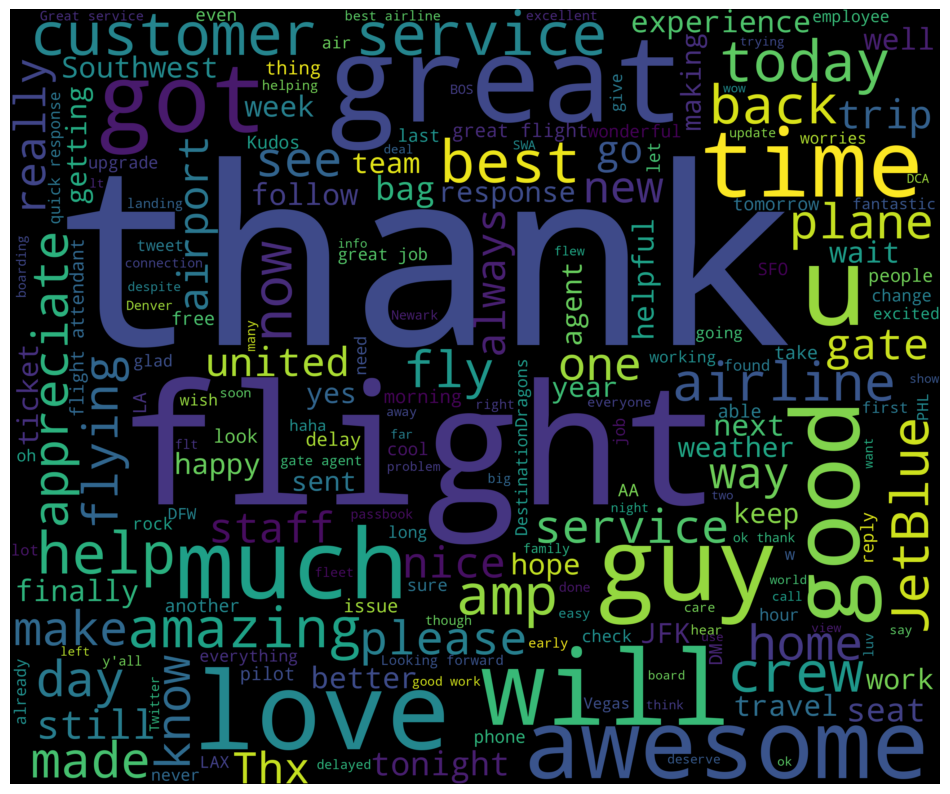

In [29]:
# Filter the DataFrame for positive sentiment tweets
positive_tweets_df = airline_tweets[airline_tweets['airline_sentiment'] == 'positive']

# Generate a word cloud for the filtered positive tweets
generate_wordcloud(positive_tweets_df)

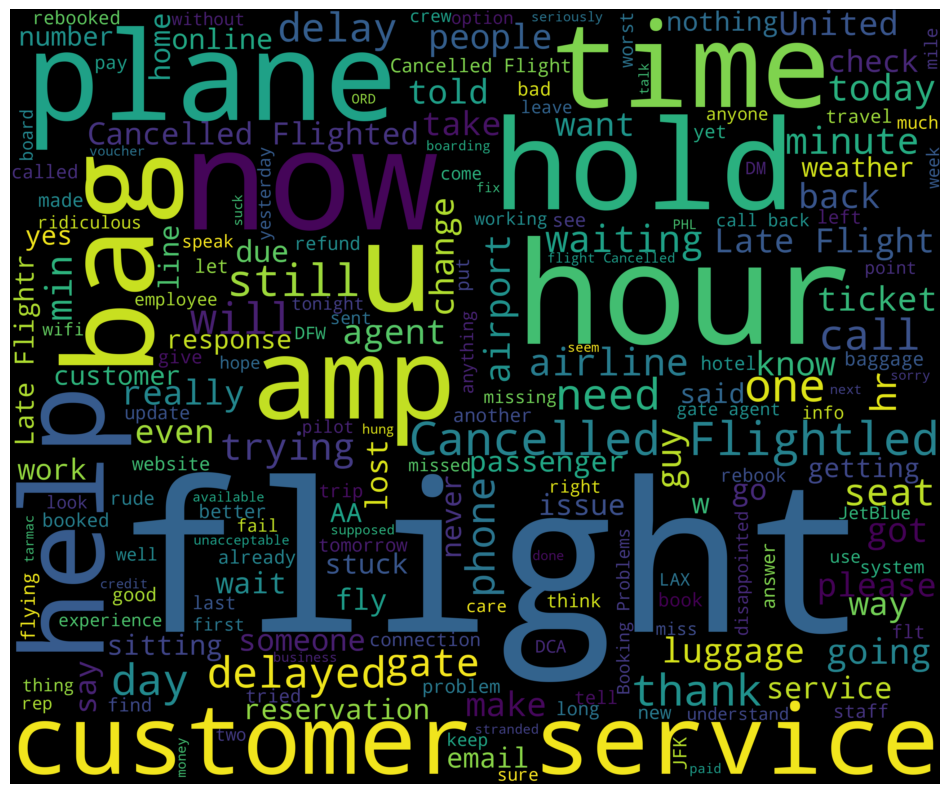

In [30]:
# Filter the DataFrame for positive sentiment tweets
negative_tweets_df = airline_tweets[airline_tweets['airline_sentiment'] == 'negative']

# Generate a word cloud for the filtered positive tweets
generate_wordcloud(negative_tweets_df)

# Data Cleaning

In [31]:
airline_data = airline_tweets[['text', 'airline_sentiment']]
airline_data.head(25)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
7,@VirginAmerica Really missed a prime opportuni...,neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive


In [32]:
airline_data.shape

(14640, 2)

In [33]:
pip install beautifulsoup4

In [34]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 3.3 MB/s eta 0:00:00


In [35]:
pip install nltk

In [36]:
import re, string, unicodedata
import contractions
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [37]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [38]:
#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)


In [39]:
#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

In [40]:
# remove the url's present in the text
def remove_url(text):
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

In [41]:
# remove the mentions in the tweets
def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

In [42]:
# remove special characters e.g the @mentions in the tweets
def remove_special_characters(text):
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  return text

In [43]:
def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    text = remove_url(text)
    text = remove_mention(text)
    text = remove_special_characters(text)
    return text


In [44]:
airline_cleaned_data = airline_data
airline_cleaned_data['text'] = airline_data['text'].apply(lambda x: clean_text(x))

<ipython-input-37-c93d0e56dd17>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-44-51b0530f2bc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_cleaned_data['text'] = airline_data['text'].apply(lambda x: clean_text(x))


In [45]:
airline_cleaned_data.head(25)

,text,airline_sentiment
0,What said,neutral
1,plus you have added commercials to the experi...,positive
2,I did not today Must mean I need to take anot...,neutral
3,it is really aggressive to blast obnoxious en...,negative
4,and it is a really big bad thing about it,negative
5,seriously would pay a flight for seats that ...,negative
6,yes nearly every time I fly VX this ear worm ...,positive
7,Really missed a prime opportunity for Men Wit...,neutral
8,Well I did notbut NOW I DO D,positive
9,it was amazing and arrived an hour early You ...,positive


In [46]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

nltk.download('punkt_tab')

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [47]:
airline_cleaned_data['text'] = airline_cleaned_data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

<ipython-input-47-f5ede0a243e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_cleaned_data['text'] = airline_cleaned_data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)


In [48]:
airline_cleaned_data.head(25)

,text,airline_sentiment
0,"[What, said]",neutral
1,"[plus, you, have, added, commercials, to, the,...",positive
2,"[I, did, not, today, Must, mean, I, need, to, ...",neutral
3,"[it, is, really, aggressive, to, blast, obnoxi...",negative
4,"[and, it, is, a, really, big, bad, thing, abou...",negative
5,"[seriously, would, pay, a, flight, for, seats,...",negative
6,"[yes, nearly, every, time, I, fly, VX, this, e...",positive
7,"[Really, missed, a, prime, opportunity, for, M...",neutral
8,"[Well, I, did, notbut, NOW, I, DO, D]",positive
9,"[it, was, amazing, and, arrived, an, hour, ear...",positive


In [49]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [50]:
# remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [51]:
# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


In [52]:
# remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

In [53]:
# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

In [54]:
stopwords = stopwords.words('english')
custom_remove_list = ['flight']
stopwords = list(set(stopwords)) + custom_remove_list
lemmatizer = WordNetLemmatizer()

In [55]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

In [56]:
airline_cleaned_data['text'] = airline_cleaned_data.apply(lambda row: normalize(row['text']), axis=1)

<ipython-input-56-e2d0399af4c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_cleaned_data['text'] = airline_cleaned_data.apply(lambda row: normalize(row['text']), axis=1)


In [57]:
airline_cleaned_data.head(25)

,text,airline_sentiment
0,say,neutral
1,plus add commercials experience tacky,positive
2,today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainmen...,negative
4,really big bad thing,negative
5,seriously would pay seat play really bad thing...,negative
6,yes nearly every time fly vx ear worm go away,positive
7,really miss prime opportunity men without hat ...,neutral
8,well notbut,positive
9,amaze arrive hour early good,positive


# Bag of Words (BOW)

In [58]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

# Initialize vectorizers
bow_vectorizer = CountVectorizer(stop_words="english", min_df=1)

# Compute BoW matrices
bow_matrix = bow_vectorizer.fit_transform(airline_cleaned_data["text"])

# Extract feature names
bow_features = bow_vectorizer.get_feature_names_out()

# Step 1: Extract BoW values for each row in the dataset
def get_feature_dict(matrix, features):
    """
    Convert sparse matrix rows into dictionaries of word: value pairs.
    """
    feature_dicts = []
    for row in range(matrix.shape[0]):
        row_data = matrix[row].tocoo()  # Convert to COO format for easy access
        feature_dict = {features[col]: row_data.data[idx] for idx, col in enumerate(row_data.col)}
        feature_dicts.append(feature_dict)
    return feature_dicts

# BoW dictionaries for each row
bow_dicts = get_feature_dict(bow_matrix, bow_features)

bow_df = airline_cleaned_data[["text", "airline_sentiment"]].copy()
bow_df["bow_values"] = bow_dicts

# Display the results
print("DataFrame with BoW values per line:")
print(bow_df)


DataFrame with BoW values per line:
                                                    text airline_sentiment  \
0                                                    say           neutral   
1                  plus add commercials experience tacky          positive   
2                 today must mean need take another trip           neutral   
3      really aggressive blast obnoxious entertainmen...          negative   
4                                   really big bad thing          negative   
...                                                  ...               ...   
14635                        thank get different chicago          positive   
14636  leave minutes late warnings communication minu...          negative   
14637          please bring american airlines blackberry           neutral   
14638  money change answer phone suggestions make com...          negative   
14639  people need know many seat next plz put us sta...           neutral   

                           

In [59]:
bow_df.head(25)

,text,airline_sentiment,bow_values
0,say,neutral,{'say': 1}
1,plus add commercials experience tacky,positive,"{'plus': 1, 'add': 1, 'commercials': 1, 'exper..."
2,today must mean need take another trip,neutral,"{'today': 1, 'mean': 1, 'need': 1, 'trip': 1}"
3,really aggressive blast obnoxious entertainmen...,negative,"{'really': 1, 'aggressive': 1, 'blast': 1, 'ob..."
4,really big bad thing,negative,"{'really': 1, 'big': 1, 'bad': 1, 'thing': 1}"
5,seriously would pay seat play really bad thing...,negative,"{'really': 1, 'bad': 1, 'thing': 1, 'seriously..."
6,yes nearly every time fly vx ear worm go away,positive,"{'fly': 1, 'yes': 1, 'nearly': 1, 'time': 1, '..."
7,really miss prime opportunity men without hat ...,neutral,"{'really': 1, 'miss': 1, 'prime': 1, 'opportun..."
8,well notbut,positive,{'notbut': 1}
9,amaze arrive hour early good,positive,"{'amaze': 1, 'arrive': 1, 'hour': 1, 'early': ..."


In [60]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize CountVectorizer for Bag of Words
vectorizer = CountVectorizer(stop_words="english")

# Transform text into BoW
X = vectorizer.fit_transform(airline_cleaned_data["text"])

# Labels (airline_sentiment)
y = airline_cleaned_data["airline_sentiment"]

Navie Bayes on BOW

In [61]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred = nb_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1889
     neutral       0.63      0.39      0.48       580
    positive       0.76      0.62      0.68       459

    accuracy                           0.77      2928
   macro avg       0.73      0.65      0.68      2928
weighted avg       0.76      0.77      0.76      2928


Confusion Matrix:
[[1751   96   42]
 [ 304  228   48]
 [ 134   40  285]]


In [62]:
nb_bow_accuracy = accuracy_score(y_test, y_pred)
print("BOW Accuracy:", nb_bow_accuracy)

BOW Accuracy: 0.773224043715847


In [63]:
nb_bow_f1score = f1_score(y_test, y_pred, average='weighted')
print("BOW F1 Score:", nb_bow_f1score)

BOW F1 Score: 0.7568515655050395


SVM on BOW

In [64]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      1889
     neutral       0.56      0.56      0.56       580
    positive       0.73      0.69      0.71       459

    accuracy                           0.78      2928
   macro avg       0.72      0.70      0.71      2928
weighted avg       0.78      0.78      0.78      2928


Confusion Matrix:
[[1642  191   56]
 [ 198  322   60]
 [  86   57  316]]


In [65]:
# Evaluate the model
svm_bow_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_bow_accuracy)

Accuracy: 0.7786885245901639


In [66]:
svm_bow_f1score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", svm_bow_f1score)

F1 Score: 0.7774763404406959


Random Forest on BOW

In [67]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 6: Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.88      0.85      1889
     neutral       0.55      0.50      0.52       580
    positive       0.72      0.64      0.68       459

    accuracy                           0.76      2928
   macro avg       0.70      0.67      0.68      2928
weighted avg       0.76      0.76      0.76      2928



In [68]:
rf_bow_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_bow_accuracy)

Accuracy: 0.7636612021857924


In [69]:
rf_bow_f1score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", rf_bow_f1score)

F1 Score: 0.7590941822204345


# Tf-IDF

In [70]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

# Initialize vectorizers
tfidf_vectorizer = TfidfVectorizer(stop_words="english", min_df=1)

# Compute BoW and TF-IDF matrices
tfidf_matrix = tfidf_vectorizer.fit_transform(airline_cleaned_data["text"])

# Extract feature names
tfidf_features = tfidf_vectorizer.get_feature_names_out()

# Step 1: Extract BoW and TF-IDF values for each row in the dataset
def get_feature_dict(matrix, features):
    """
    Convert sparse matrix rows into dictionaries of word: value pairs.
    """
    feature_dicts = []
    for row in range(matrix.shape[0]):
        row_data = matrix[row].tocoo()  # Convert to COO format for easy access
        feature_dict = {features[col]: row_data.data[idx] for idx, col in enumerate(row_data.col)}
        feature_dicts.append(feature_dict)
    return feature_dicts

#TF-IDF dictionaries for each row
tfidf_dicts = get_feature_dict(tfidf_matrix, tfidf_features)

tfidf_df = airline_cleaned_data[["text", "airline_sentiment"]].copy()
tfidf_df["tfidf_values"] = tfidf_dicts

# Display the results
print("DataFrame with Tf-IDF values per line:")
print(tfidf_df)



DataFrame with Tf-IDF values per line:
                                                    text airline_sentiment  \
0                                                    say           neutral   
1                  plus add commercials experience tacky          positive   
2                 today must mean need take another trip           neutral   
3      really aggressive blast obnoxious entertainmen...          negative   
4                                   really big bad thing          negative   
...                                                  ...               ...   
14635                        thank get different chicago          positive   
14636  leave minutes late warnings communication minu...          negative   
14637          please bring american airlines blackberry           neutral   
14638  money change answer phone suggestions make com...          negative   
14639  people need know many seat next plz put us sta...           neutral   

                        

In [71]:
tfidf_df.head(25)

,text,airline_sentiment,tfidf_values
0,say,neutral,{'say': 1.0}
1,plus add commercials experience tacky,positive,"{'plus': 0.39196397039491276, 'add': 0.3486582..."
2,today must mean need take another trip,neutral,"{'today': 0.4607508484736325, 'mean': 0.592181..."
3,really aggressive blast obnoxious entertainmen...,negative,"{'really': 0.2030957920413559, 'aggressive': 0..."
4,really big bad thing,negative,"{'really': 0.42406058199159613, 'big': 0.54637..."
5,seriously would pay seat play really bad thing...,negative,"{'really': 0.277560775768575, 'bad': 0.3063619..."
6,yes nearly every time fly vx ear worm go away,positive,"{'fly': 0.19638602531249671, 'yes': 0.25351482..."
7,really miss prime opportunity men without hat ...,neutral,"{'really': 0.23485374462448688, 'miss': 0.2209..."
8,well notbut,positive,{'notbut': 1.0}
9,amaze arrive hour early good,positive,"{'amaze': 0.49227451688496326, 'arrive': 0.459..."


In [72]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")

# Transform text into TF-IDF representation
X_tfidf = vectorizer.fit_transform(airline_cleaned_data["text"])

# Labels (airline_sentiment)
y = airline_cleaned_data["airline_sentiment"]

Naive bayes on Tf-IDF

In [73]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7059426229508197

Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.99      0.82      1889
     neutral       0.75      0.16      0.27       580
    positive       0.89      0.23      0.36       459

    accuracy                           0.71      2928
   macro avg       0.78      0.46      0.48      2928
weighted avg       0.74      0.71      0.64      2928


Confusion Matrix:
[[1868   18    3]
 [ 476   94   10]
 [ 341   13  105]]


In [74]:
tfidf_nb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", tfidf_nb_accuracy)

Accuracy: 0.7059426229508197


In [75]:
tfidf_nb_f1score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", tfidf_nb_f1score)

F1 Score: 0.6368298332725688


SVM on Tf-IDF

In [76]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7903005464480874

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.92      0.87      1889
     neutral       0.62      0.47      0.54       580
    positive       0.80      0.66      0.72       459

    accuracy                           0.79      2928
   macro avg       0.75      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928


Confusion Matrix:
[[1738  113   38]
 [ 269  273   38]
 [ 103   53  303]]


In [77]:
tfidf_svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", tfidf_svm_accuracy)

Accuracy: 0.7903005464480874


In [78]:
tfidf_svm_f1score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", tfidf_svm_f1score)

F1 Score: 0.7802775860875004


Random Forest on Tf-IDF

In [79]:
      # Split the data into training and testing sets
      X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

      # Train Random Forest Classifier
      rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
      rf_classifier.fit(X_train, y_train)

      # Make Predictions
      y_pred = rf_classifier.predict(X_test)

      # Evaluate the Model
      print("Classification Report:")
      print(classification_report(y_test, y_pred))

      print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.91      0.86      1889
     neutral       0.61      0.47      0.53       580
    positive       0.74      0.59      0.66       459

    accuracy                           0.77      2928
   macro avg       0.72      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928

Accuracy Score: 0.773224043715847


In [80]:
tfidf_rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", tfidf_rf_accuracy)

Accuracy: 0.773224043715847


In [81]:
tfidf_rf_f1score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", tfidf_rf_f1score)

F1 Score: 0.763067468368422


# GloVe

In [82]:
airline_cleaned_data.head(5)

,text,airline_sentiment
0,say,neutral
1,plus add commercials experience tacky,positive
2,today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainmen...,negative
4,really big bad thing,negative


In [83]:
# Download GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip

# Unzip the embeddings
!unzip glove.6B.zip

--2024-12-02 01:45:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-12-02 01:45:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-12-02 01:45:12--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [84]:
data_glove = airline_cleaned_data[['text', 'airline_sentiment']]

In [85]:
# Load GloVe embeddings
def load_glove_embeddings(glove_file):
    embeddings = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Compute tweet vector by averaging word vectors
def compute_tweet_vector(tweet, embeddings, vector_dim):
    words = tweet.split()
    word_vectors = [embeddings[word] for word in words if word in embeddings]
    if word_vectors:
        return np.mean(word_vectors, axis=0)  # Average the word vectors
    else:
        return np.zeros(vector_dim)  # Return a zero vector if no valid words


In [86]:
# Load GloVe embeddings
glove_file = "glove.6B.100d.txt"
glove_embeddings = load_glove_embeddings(glove_file)
vector_dim = 100

# Computing GloVe vectors
data_glove['glove_vector'] = data_glove['text'].apply(
    lambda x: compute_tweet_vector(x, glove_embeddings, vector_dim)
)

data_glove.head(10)

,text,airline_sentiment,glove_vector
0,say,neutral,"[-0.091682, 0.58105, 0.40477, -0.41979, -0.851..."
1,plus add commercials experience tacky,positive,"[-0.36221498, 0.27751, 0.052436203, -0.270876,..."
2,today must mean need take another trip,neutral,"[-0.2194157, 0.28877994, 0.4928843, -0.0123379..."
3,really aggressive blast obnoxious entertainmen...,negative,"[-0.060749445, 0.101605564, 0.38292885, -0.263..."
4,really big bad thing,negative,"[0.14067501, 0.32833, 0.8000475, -0.651425, -0..."
5,seriously would pay seat play really bad thing...,negative,"[-0.0476728, 0.1383447, 0.540871, -0.42537388,..."
6,yes nearly every time fly vx ear worm go away,positive,"[-0.055459596, 0.3807393, 0.4796152, -0.391535..."
7,really miss prime opportunity men without hat ...,neutral,"[-0.08456901, -0.016216997, 0.2530635, -0.2439..."
8,well notbut,positive,"[-0.53086, 0.51404, 0.087599, -0.37314, 0.2747..."
9,amaze arrive hour early good,positive,"[-0.3311298, -0.020783002, 0.2640552, 0.189881..."


Model Training on Glove Dataset

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [88]:
label_encoder = LabelEncoder()
data_glove['sentiment_encoded'] = label_encoder.fit_transform(data_glove['airline_sentiment'])
# X = data_glove['glove_vector'].apply(lambda x: np.array(x))
X = np.array(data_glove['glove_vector'].tolist())
y = data_glove['sentiment_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

SVM with GloVe

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
print("SVM Performance:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))

SVM Performance:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1889
           1       0.58      0.25      0.35       580
           2       0.75      0.57      0.65       459

    accuracy                           0.75      2928
   macro avg       0.70      0.59      0.61      2928
weighted avg       0.73      0.75      0.71      2928

Accuracy: 0.7465846994535519


In [90]:
glove_svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy:", glove_svm_accuracy)

Accuracy: 0.7465846994535519


In [91]:
glove_svm_f1score = f1_score(y_test, svm_predictions, average='weighted')
print("F1 Score:", glove_svm_f1score)

F1 Score: 0.7147667270875911


Naive Bayes with GloVe

In [92]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
nb_predictions = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Performance:")
print(classification_report(y_test, nb_predictions))
print("Accuracy:", accuracy_score(y_test, nb_predictions))

Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1889
           1       0.43      0.41      0.42       580
           2       0.62      0.38      0.47       459

    accuracy                           0.68      2928
   macro avg       0.60      0.54      0.56      2928
weighted avg       0.67      0.68      0.67      2928

Accuracy: 0.6844262295081968


In [93]:
glove_nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Accuracy:", glove_nb_accuracy)

Accuracy: 0.6844262295081968


In [94]:
glove_nb_f1score = f1_score(y_test, nb_predictions, average='weighted')
print("F1 Score:", glove_nb_f1score)

F1 Score: 0.6723858979740771


Random Forest on GloVe


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      1889
           1       0.64      0.32      0.43       580
           2       0.77      0.42      0.55       459

    accuracy                           0.74      2928
   macro avg       0.72      0.57      0.61      2928
weighted avg       0.73      0.74      0.71      2928

Accuracy: 0.7441939890710383


In [96]:
glove_rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", glove_rf_accuracy)

Accuracy: 0.7441939890710383


In [97]:
glove_rf_f1score = f1_score(y_test, rf_predictions, average='weighted')
print("F1 Score:", glove_rf_f1score)

F1 Score: 0.7133824121300231


# Word2Vec

In [98]:
airline_cleaned_data.head(10)

,text,airline_sentiment
0,say,neutral
1,plus add commercials experience tacky,positive
2,today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainmen...,negative
4,really big bad thing,negative
5,seriously would pay seat play really bad thing...,negative
6,yes nearly every time fly vx ear worm go away,positive
7,really miss prime opportunity men without hat ...,neutral
8,well notbut,positive
9,amaze arrive hour early good,positive


In [99]:
data_word2vec = airline_cleaned_data[['text', 'airline_sentiment']]

In [100]:
from gensim.models import Word2Vec

# Train Word2Vec model
sentences = data_word2vec["text"].tolist()  # List of tokenized sentences
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save model
word2vec_model.save("word2vec.model")

In [101]:
def get_sentence_vector(sentence, model):
    vector = np.zeros(model.vector_size)
    count = 0
    for word in sentence:
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    return vector / count if count > 0 else vector

In [102]:
data_word2vec["vector"] = data_word2vec["text"].apply(lambda x: get_sentence_vector(x, word2vec_model))

In [103]:
data_word2vec.head(10)

,text,airline_sentiment,vector
0,say,neutral,"[-0.027677764495213825, 0.18452341047426066, 0..."
1,plus add commercials experience tacky,positive,"[-0.006764207840771289, 0.043976012000663055, ..."
2,today must mean need take another trip,neutral,"[-0.03864203996368145, 0.04389523174368629, 0...."
3,really aggressive blast obnoxious entertainmen...,negative,"[-0.05390454058845838, 0.05142814207822084, 0...."
4,really big bad thing,negative,"[-0.018752448353916408, 0.050050198996905236, ..."
5,seriously would pay seat play really bad thing...,negative,"[0.02012944421818796, 0.07003030155451512, 0.1..."
6,yes nearly every time fly vx ear worm go away,positive,"[0.008993327286508349, 0.061357988603413106, 0..."
7,really miss prime opportunity men without hat ...,neutral,"[-0.026433907234324858, 0.07845530793733466, 0..."
8,well notbut,positive,"[-0.013425039635463194, 0.05796066307547418, 0..."
9,amaze arrive hour early good,positive,"[-0.0587603491730988, 0.06304567943360391, 0.1..."


Model Training on Word2Vec Dataset

In [104]:
# Encode target variable
label_encoder = LabelEncoder()
data_word2vec['sentiment_encoded'] = label_encoder.fit_transform(data_word2vec['airline_sentiment'])

# Prepare features and labels
X = np.array(data_word2vec['vector'].tolist())  # Convert Word2Vec vectors to 2D array
y = data_word2vec['sentiment_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SVM with Word2Vec

In [105]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
print("SVM Performance:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))

SVM Performance:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1889
           1       0.56      0.01      0.02       580
           2       0.80      0.05      0.10       459

    accuracy                           0.65      2928
   macro avg       0.67      0.35      0.30      2928
weighted avg       0.66      0.65      0.53      2928

Accuracy: 0.6540300546448088


In [106]:
word2vec_svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy:", word2vec_svm_accuracy)

Accuracy: 0.6540300546448088


In [107]:
word2vec_svm_f1score = f1_score(y_test, svm_predictions, average='weighted')
print("F1 Score:", word2vec_svm_f1score)

F1 Score: 0.5280657741324992


Naive Bayes wtih Word2Vec

In [108]:
# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
nb_predictions = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Performance:")
print(classification_report(y_test, nb_predictions))
print("Accuracy:", accuracy_score(y_test, nb_predictions))

Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78      1889
           1       0.39      0.26      0.31       580
           2       0.41      0.22      0.29       459

    accuracy                           0.64      2928
   macro avg       0.50      0.45      0.46      2928
weighted avg       0.60      0.64      0.61      2928

Accuracy: 0.6413934426229508


In [109]:
word2vec_nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Accuracy:", word2vec_nb_accuracy)

Accuracy: 0.6413934426229508


In [110]:
word2vec_nb_f1score = f1_score(y_test, nb_predictions, average='weighted')
print("F1 Score:", word2vec_nb_f1score)

F1 Score: 0.6087160181022618


Random Forest with Word2Vec

In [111]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81      1889
           1       0.54      0.24      0.34       580
           2       0.64      0.21      0.32       459

    accuracy                           0.69      2928
   macro avg       0.63      0.47      0.49      2928
weighted avg       0.66      0.69      0.64      2928

Accuracy: 0.6892076502732241


In [112]:
word2vec_rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", word2vec_rf_accuracy)

Accuracy: 0.6892076502732241


In [113]:
word2vec_rf_f1score = f1_score(y_test, rf_predictions, average='weighted')
print("F1 Score:", word2vec_rf_f1score)

F1 Score: 0.6382952776994968


# Performance Analysis

In [114]:
analysis_data = {
    'Model': ['SVM', 'Naive Bayes', 'Random Forest'],
    'BoW (Accuracy)': [svm_bow_accuracy, nb_bow_accuracy, rf_bow_accuracy],
    'TF-IDF (Accuracy)': [tfidf_svm_accuracy, tfidf_nb_accuracy, tfidf_rf_accuracy],
    'Word2Vec (Accuracy)': [word2vec_svm_accuracy, word2vec_nb_accuracy, word2vec_rf_accuracy],
    'GloVe (Accuracy)': [glove_svm_accuracy, glove_nb_accuracy, glove_rf_accuracy],
}

# Create the DataFrame
analysis_df = pd.DataFrame(analysis_data)

# Display the DataFrame
analysis_df

,Model,BoW (Accuracy),TF-IDF (Accuracy),Word2Vec (Accuracy),GloVe (Accuracy)
0,SVM,0.778689,0.790301,0.654030,0.746585
1,Naive Bayes,0.773224,0.705943,0.641393,0.684426
2,Random Forest,0.763661,0.773224,0.689208,0.744194


In [115]:
analysis_data_f1 = {
    'Model': ['SVM', 'Naive Bayes', 'Random Forest'],
    'BoW (F1 Score)': [svm_bow_f1score, nb_bow_f1score, rf_bow_f1score],
    'TF-IDF (F1 Score)': [tfidf_svm_f1score, tfidf_nb_f1score, tfidf_rf_f1score],
    'Word2Vec (F1 Score)': [word2vec_svm_f1score, word2vec_nb_f1score, word2vec_rf_f1score],
    'GloVe (F1 Score)': [glove_svm_f1score, glove_nb_f1score, glove_rf_f1score],
}

# Create the DataFrame
analysis_df_f1 = pd.DataFrame(analysis_data_f1)

# Display the DataFrame
analysis_df_f1

,Model,BoW (F1 Score),TF-IDF (F1 Score),Word2Vec (F1 Score),GloVe (F1 Score)
0,SVM,0.777476,0.780278,0.528066,0.714767
1,Naive Bayes,0.756852,0.636830,0.608716,0.672386
2,Random Forest,0.759094,0.763067,0.638295,0.713382


SVM achieves the best accuracy (0.79) and F1 score (0.78) with TF-IDF but struggles with dense embeddings like Word2Vec. Random Forest performs competitively, especially with BoW and TF-IDF, and shows robustness with GloVe (accuracy: 0.74). Naive Bayes lags behind due to its simplistic assumptions, performing poorly with complex embeddings like GloVe and Word2Vec.

Overall, TF-IDF paired with SVM is the most effective combination, leveraging sparse representations well. GloVe also performs well, particularly with Random Forest and SVM, while Word2Vec underperforms, likely due to its reliance on contextual nuances that the models struggle to exploit.